# Project Proposal

### STAT 201 Group 37. Elias, Beren, Elaine, Nika.

## Introduction

Crime rate is one of the most important figures that people would pay attention to since it is tightly related to citizens' safety. Vancouver is the largest city in British Columbia, and it is also one of the best cities to live in around the world. Hence, it is significantly meaningful to explore the criminal cases, especially violent crimes across neighbourhoods in Vancouver.

In this project, the question we will solve is which neighbourhood is the safest away from violent crimes. To explore the question further, we will choose the proportion and the standard deviation of violent crime cases across neighbourhoods as parameters to inference.

We will use the Vancouver Crime Dataset released by Vancouver Police Department (VPD) as the sample. Since the dataset is updated every day, it is constantly changing. We chose to take data from all neighbourhoods in the year 2020. To find the exact dataset that we used, you must visit our [GitHub Repository](https://github.com/sasiburi/STAT201-Group37).

## Method

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



We must first load in our dataset. Since it is hard to directly download from the VPD website, and selections of years and neighborhoods are required. We load the data from our [GitHub repository](https://github.com/sasiburi/STAT201-Group37).

In [2]:
crime <- read_csv("https://raw.githubusercontent.com/sasiburi/STAT201-Group37/main/crimedata_csv_AllNeighbourhoods_2020/crimedata_csv_AllNeighbourhoods_2020.csv")
head(crime)

Rows: 37492 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Theft of Vehicle,2020,4,19,21,30,29XX SLOCAN ST,Renfrew-Collingwood,496397.5,5456123
Theft of Vehicle,2020,2,21,1,43,29XX VENABLES ST,Hastings-Sunrise,496801.2,5458182
Theft of Vehicle,2020,2,11,1,30,29XX VIRTUAL WAY,Renfrew-Collingwood,497011.9,5456474
Theft of Vehicle,2020,5,16,22,0,29XX W 10TH AVE,Kitsilano,487613.2,5456729
Theft of Vehicle,2020,1,1,12,0,29XX WOODLAND DR,Kensington-Cedar Cottage,494641.9,5456214
Theft of Vehicle,2020,11,22,0,37,2X E CORDOVA ST,Central Business District,492453.1,5458847


Now that we have loaded our data into R, we must create a new column to differentiate crimes that are violent and crimes that aren't violent.

In [3]:
violance_data <- crime %>%
                 filter(TYPE == "Offence Against a Person"| TYPE == "Assaults Against Police") %>%
                 mutate(Violent = TRUE)
              
nonviolance_data <- crime %>%
                     filter(TYPE != "Offence Against a Person" & TYPE != "Assaults Against Police") %>%
                     mutate(Violent = FALSE)



crime_data_full <- rbind(violance_data, nonviolance_data)
head(crime_data_full)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Violent
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<lgl>
Offence Against a Person,2020,3,16,0,0,OFFSET TO PROTECT PRIVACY,Stanley Park,0,0,TRUE
Offence Against a Person,2020,8,6,0,0,OFFSET TO PROTECT PRIVACY,Stanley Park,0,0,TRUE
Offence Against a Person,2020,12,23,0,0,OFFSET TO PROTECT PRIVACY,Stanley Park,0,0,TRUE
Offence Against a Person,2020,9,7,0,0,OFFSET TO PROTECT PRIVACY,Stanley Park,0,0,TRUE
Offence Against a Person,2020,9,11,0,0,OFFSET TO PROTECT PRIVACY,Stanley Park,0,0,TRUE
Offence Against a Person,2020,9,20,0,0,OFFSET TO PROTECT PRIVACY,Stanley Park,0,0,TRUE


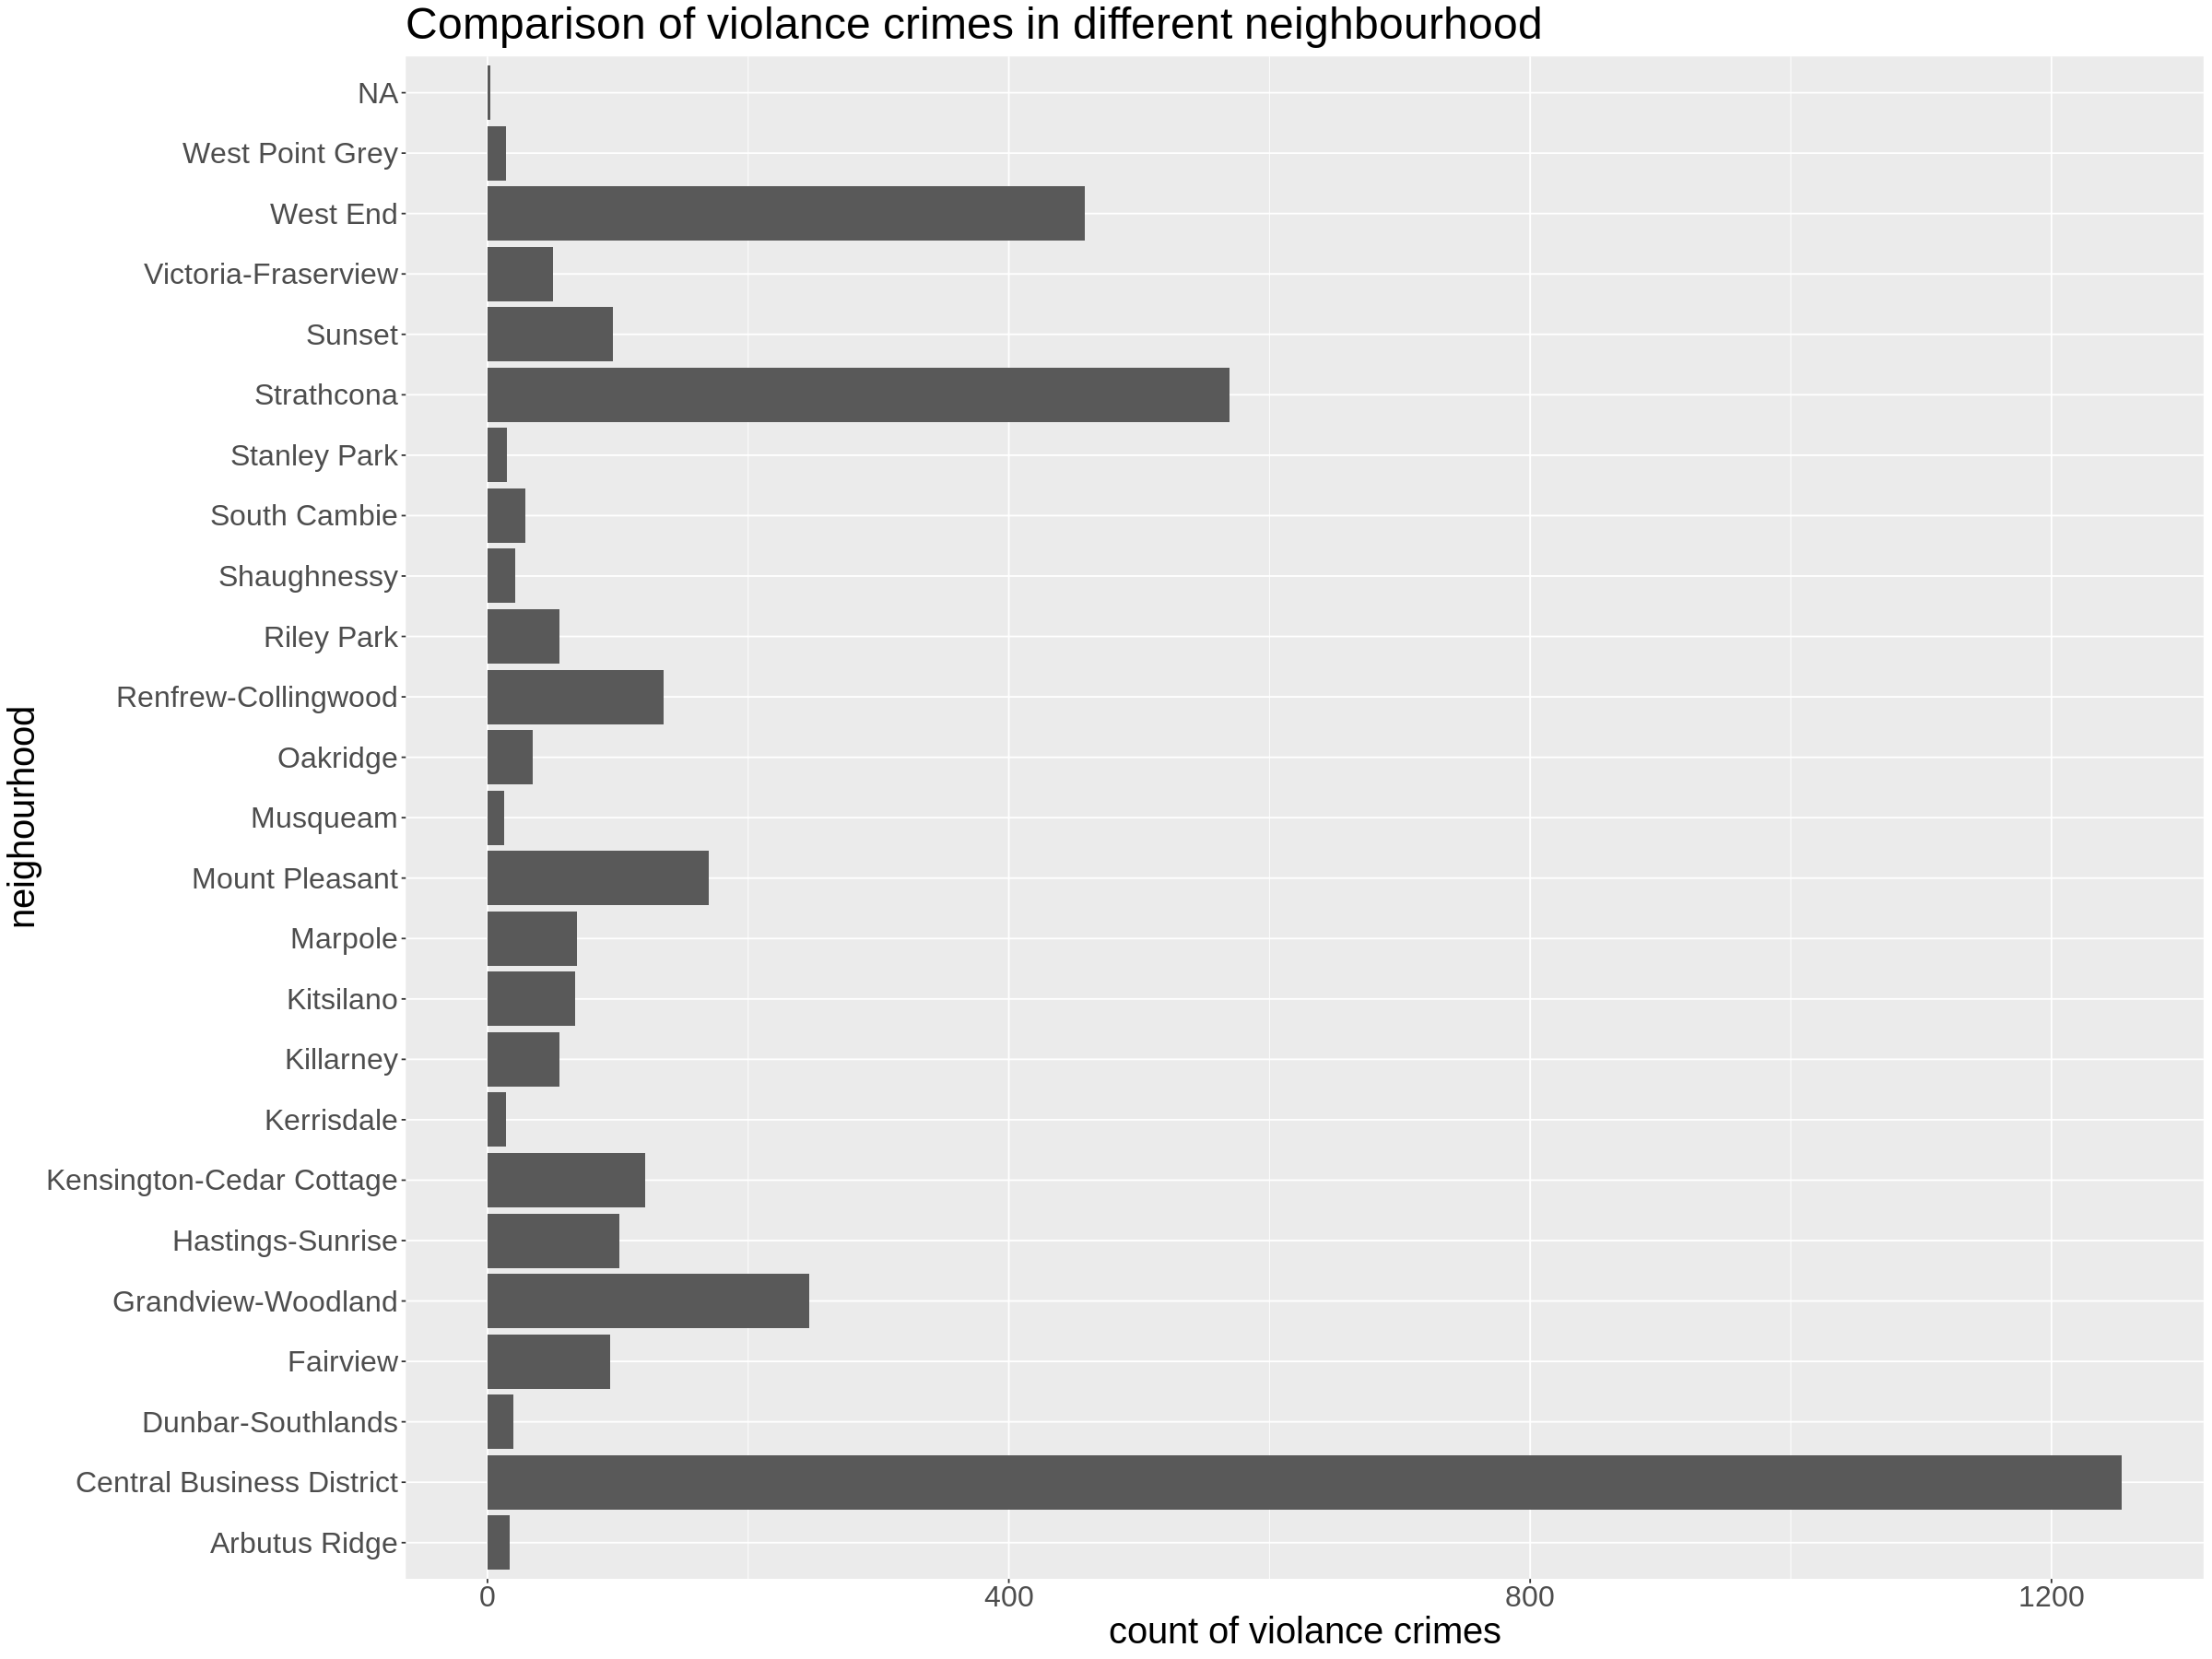

In [14]:
options(repr.plot.width = 20, repr.plot.height = 15)
count_violent_plot <- violance_data %>%
             ggplot(aes(x = NEIGHBOURHOOD)) +
             geom_bar() +
             xlab("neighourhood") +
             ylab("count of violance crimes") +
             ggtitle("Comparison of violance crimes in different neighbourhood") +
             coord_flip() +
             theme(text = element_text(size = 24))        
count_violent_plot

Now that we have created a new column to sort out whether a crime is violent or not, our first course of action is to find what proportion of crimes in Vancouver are violent.

In [5]:
prop_of_nonviolent_crimes_van <- crime_data_full %>%
    summarise(violent_proportion= sum(Violent== "TRUE")/37492)
prop_of_nonviolent_crimes_van

violent_proportion
<dbl>
0.09924784


Our findings lead us to believe that roughly 10% of crimes committed in the city of Vancouver are violent crimes.

In [6]:
prop_violent_crime <- crime_data_full %>%
              group_by(NEIGHBOURHOOD) %>%
              summarize(prop = sum(Violent == TRUE)/n())
prop_violent_crime

NEIGHBOURHOOD,prop
<chr>,<dbl>
Arbutus Ridge,0.04594595
Central Business District,0.12114772
Dunbar-Southlands,0.03937008
Fairview,0.04402810
Grandview-Woodland,0.12738525
Hastings-Sunrise,0.07847708
Kensington-Cedar Cottage,0.07311178
Kerrisdale,0.03043478
Killarney,0.09337861


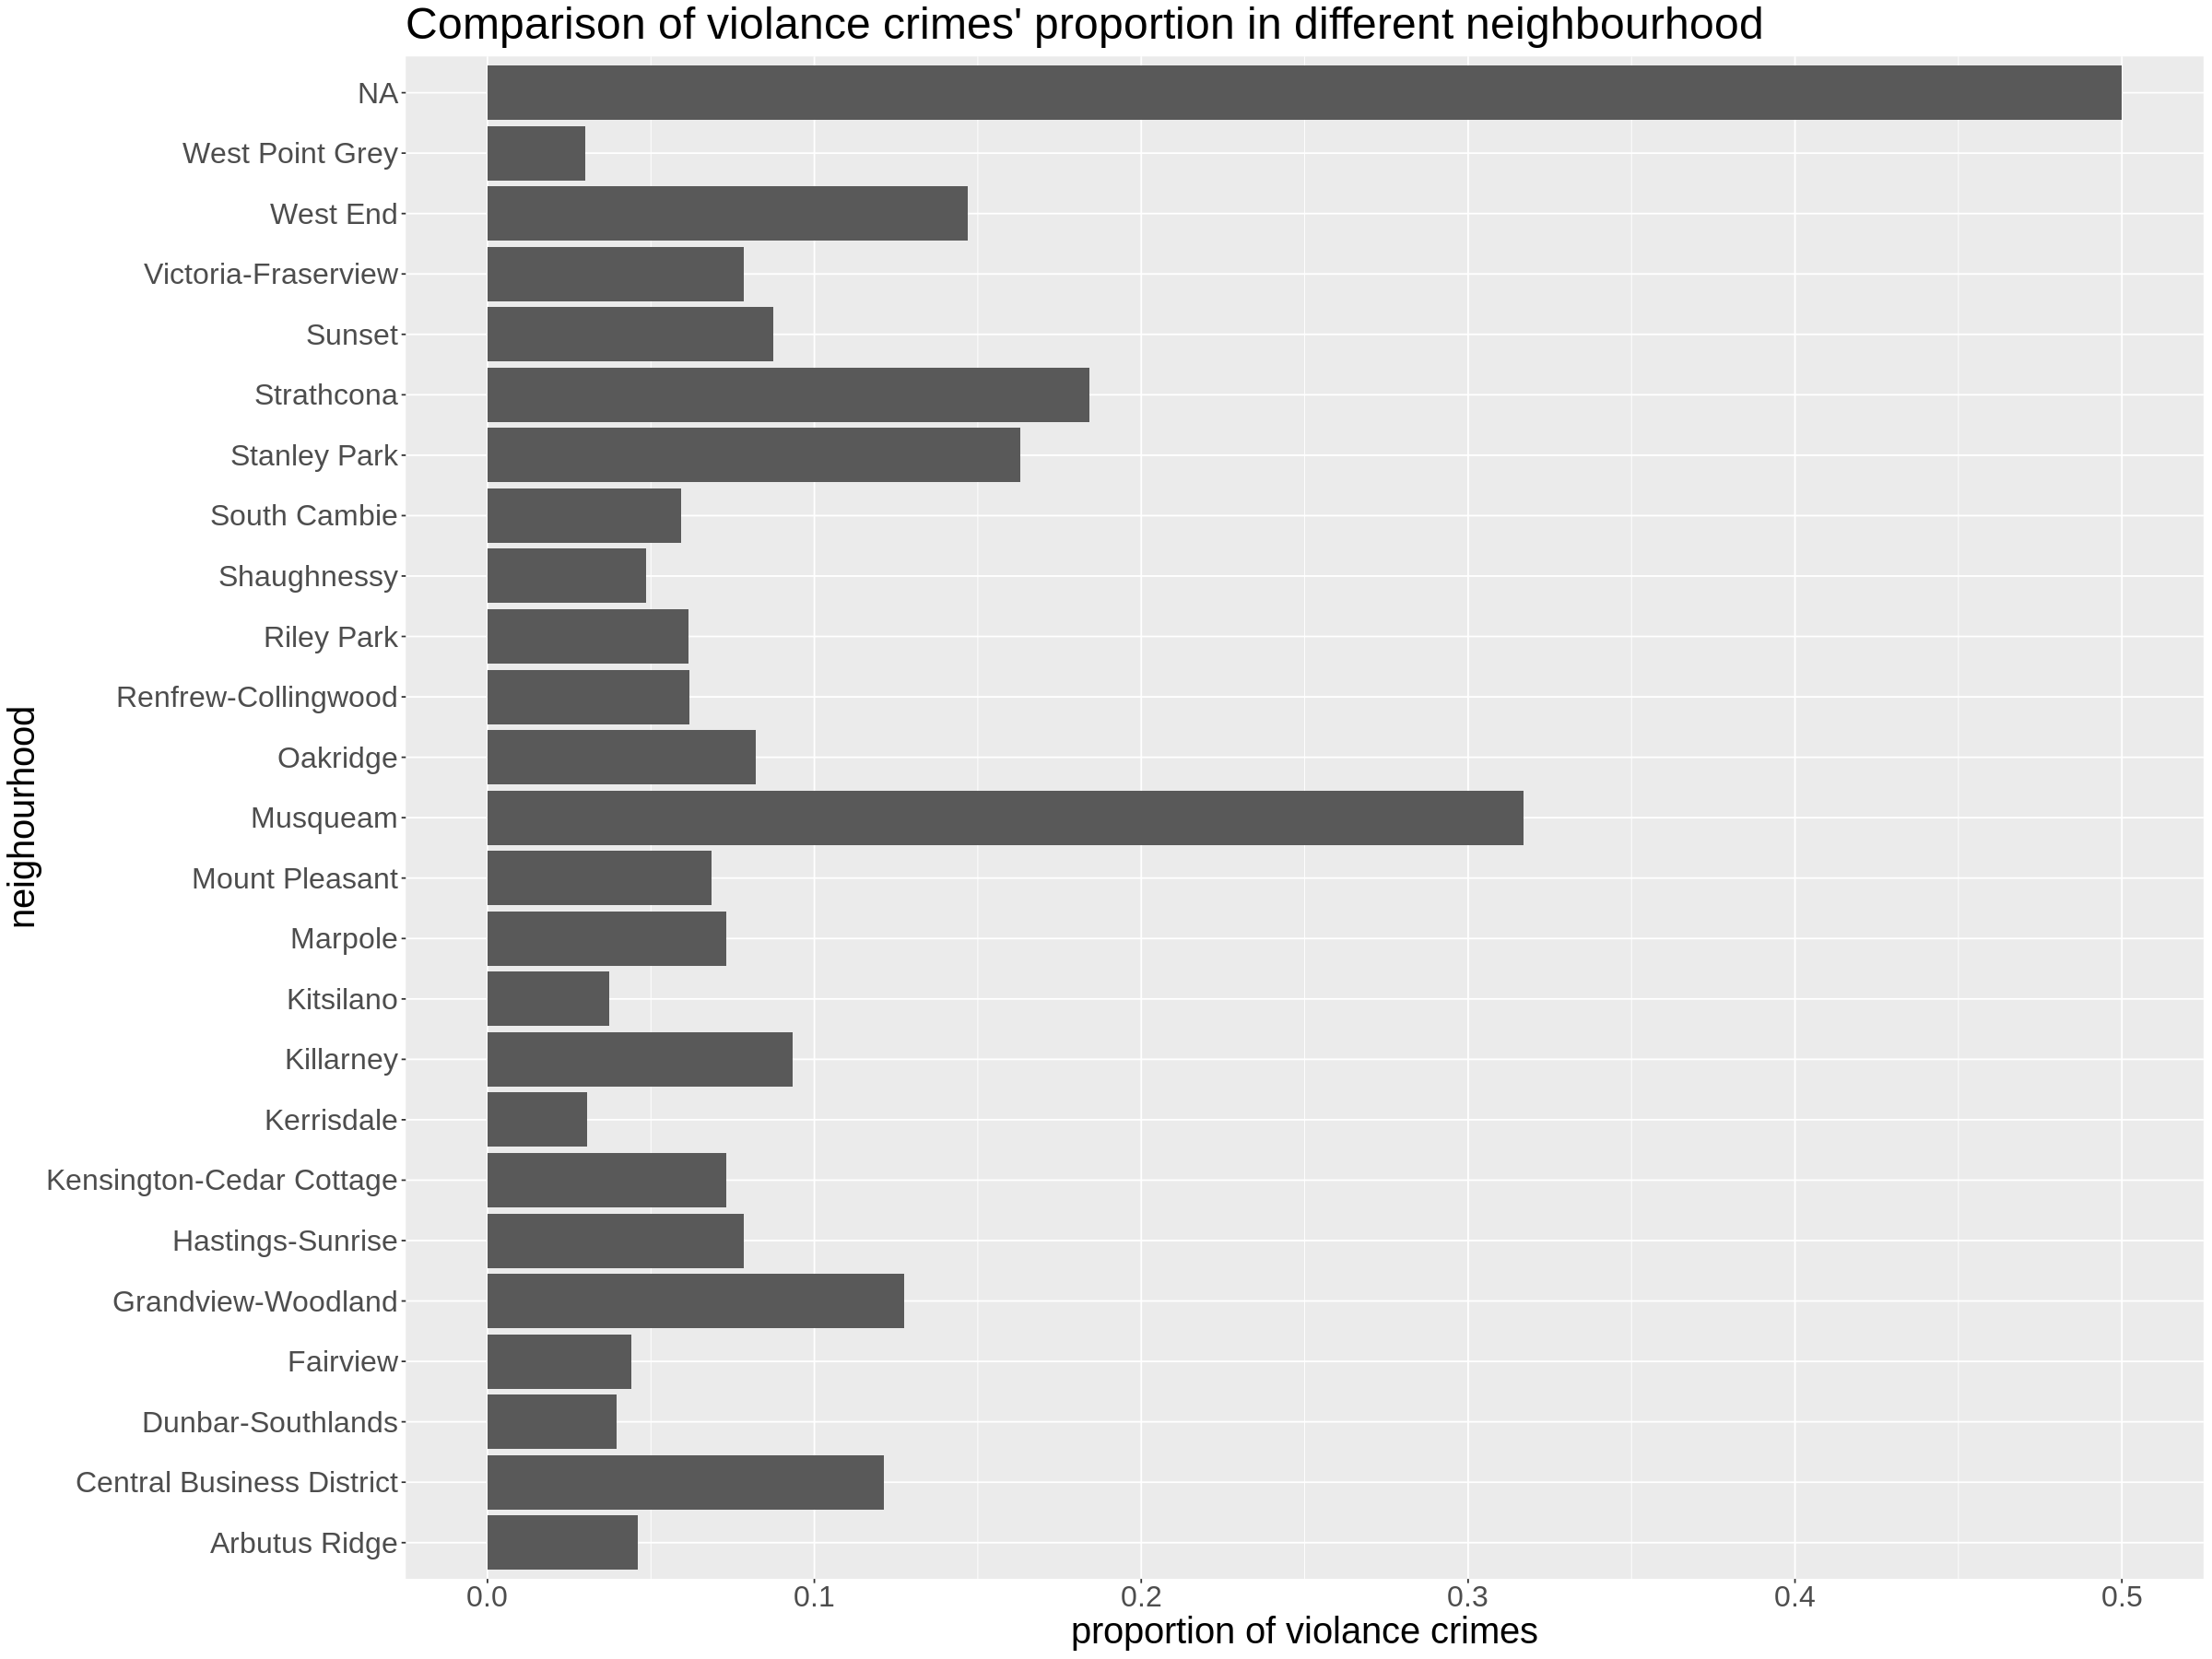

In [7]:
options(repr.plot.width = 20, repr.plot.height = 15)
prop_plot <- prop_violent_crime %>%
             ggplot(aes(x = NEIGHBOURHOOD, y = prop)) +
             geom_bar(stat = 'identity') +
             xlab("neighourhood") +
             ylab("proportion of violance crimes") +
             ggtitle("Comparison of violance crimes' proportion in different neighbourhood") +
             coord_flip() +
             theme(text = element_text(size = 24))        
prop_plot

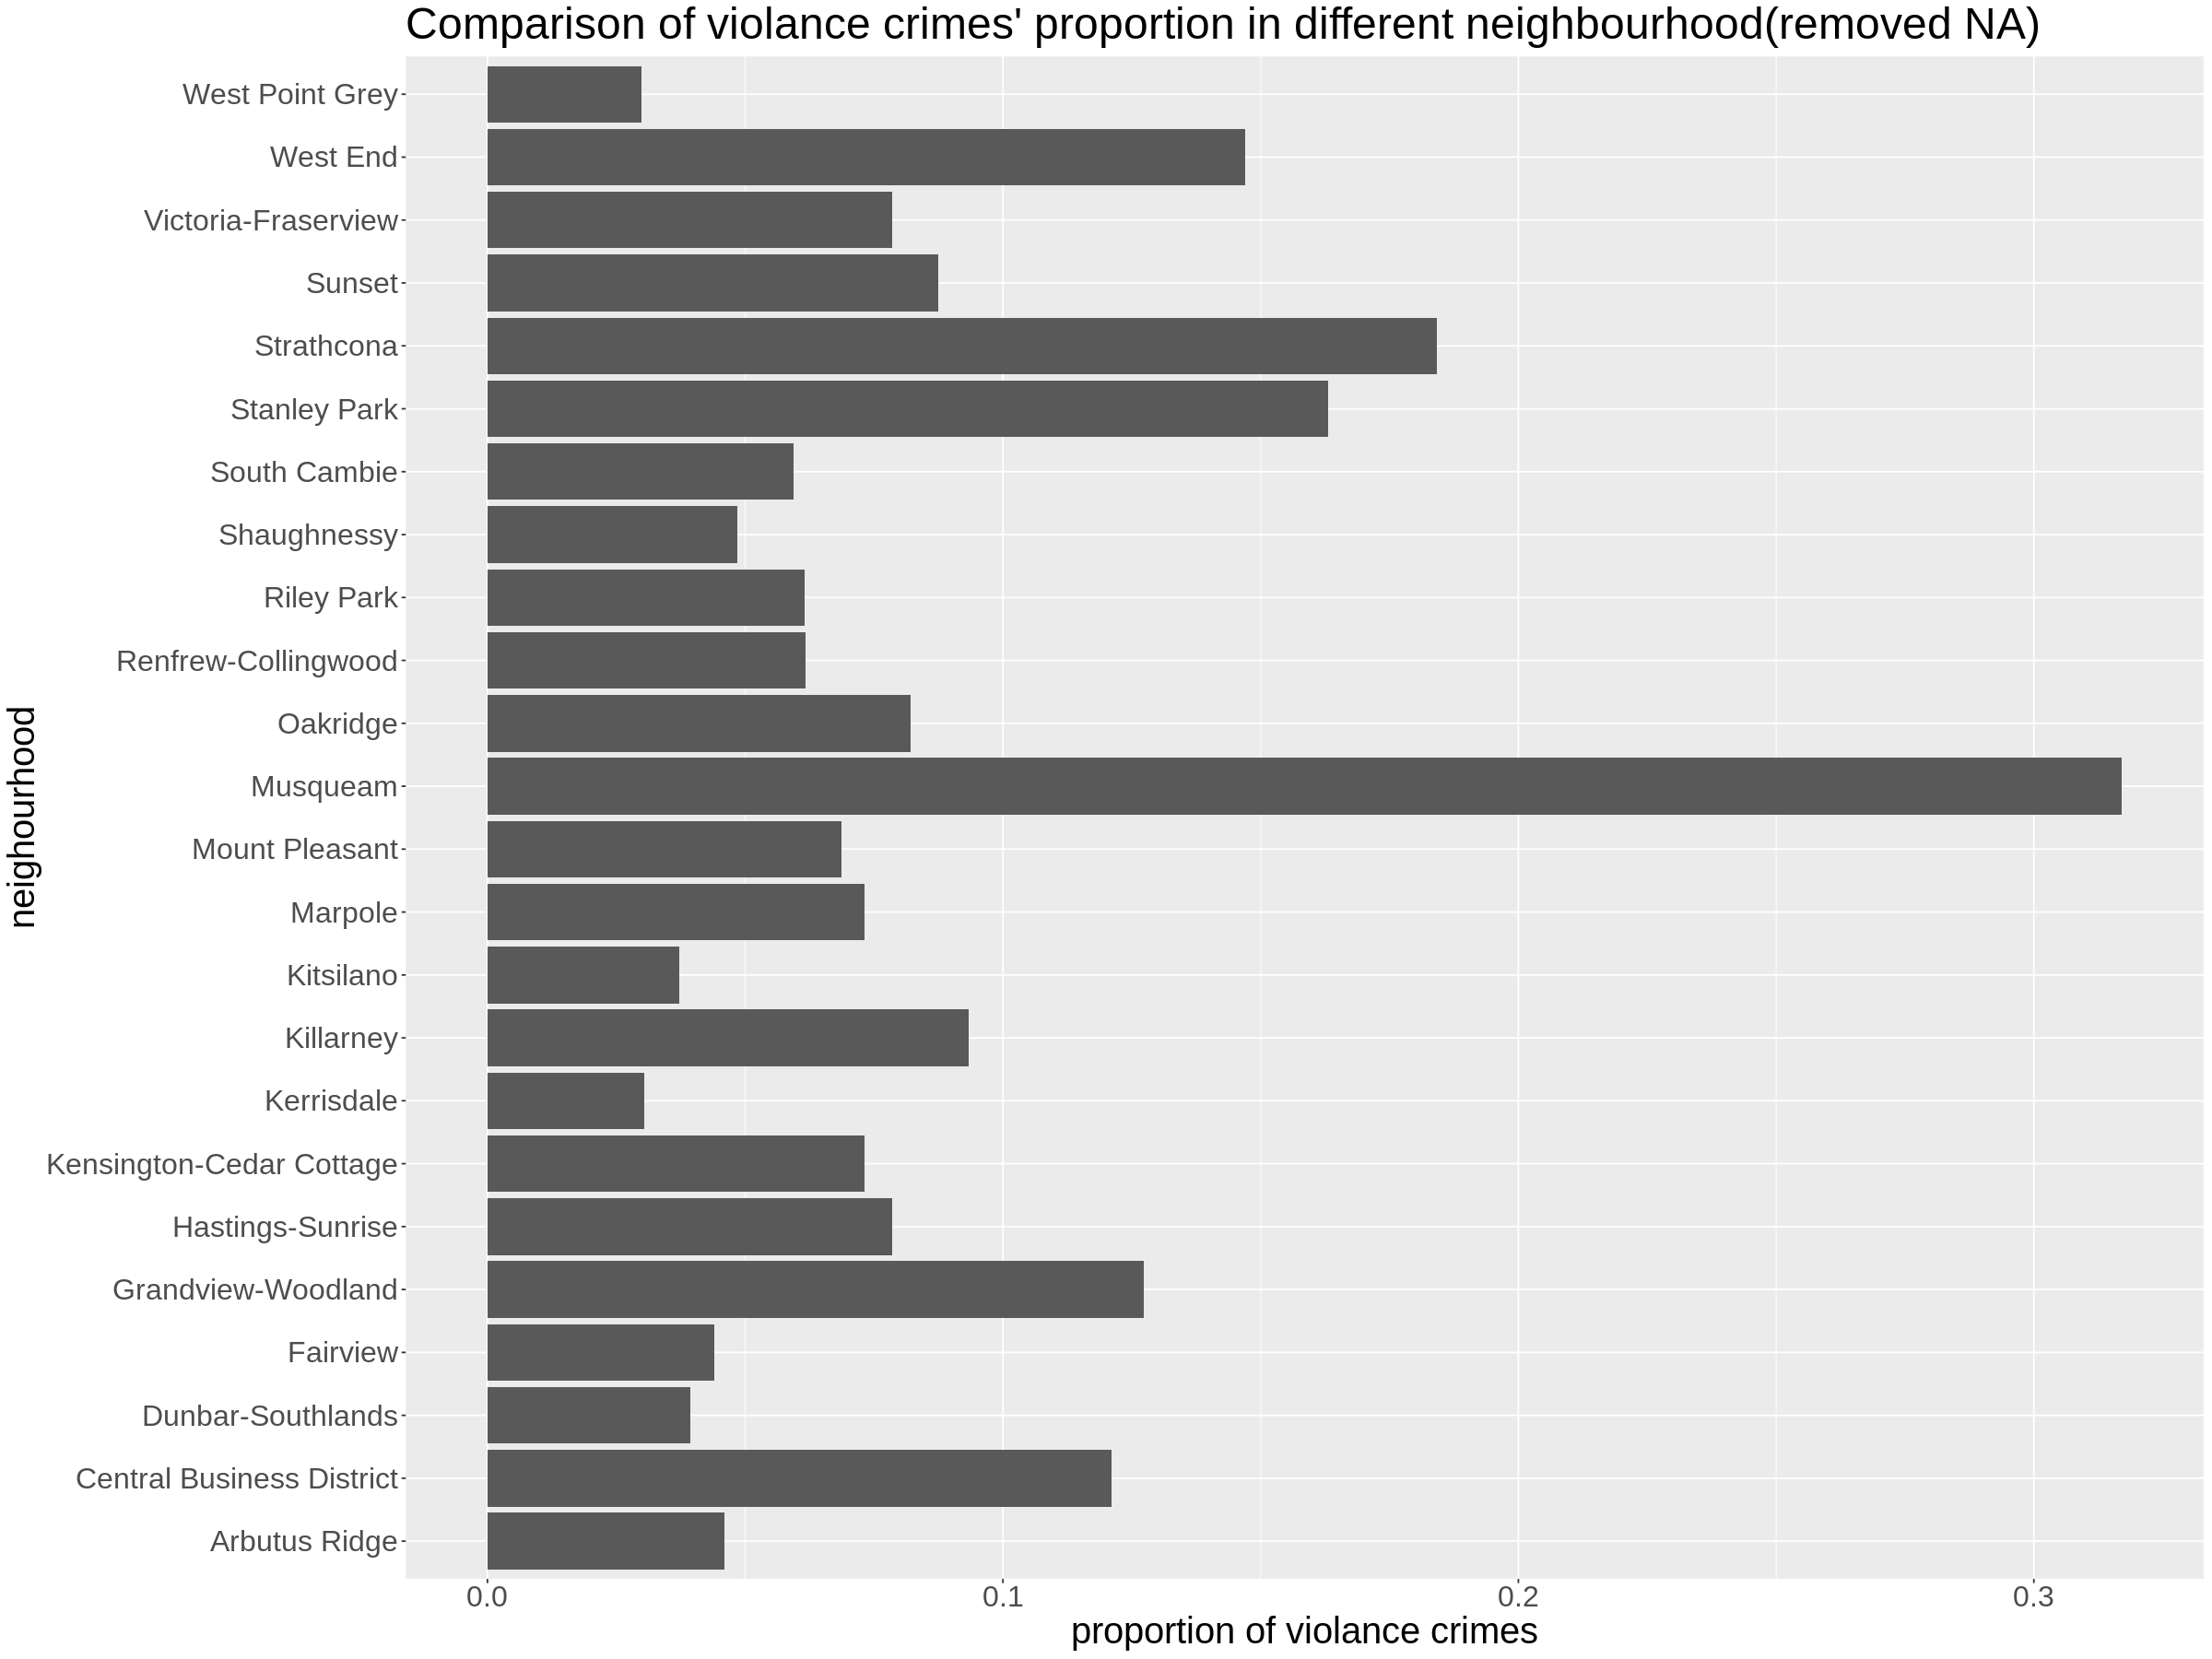

In [8]:
prop_crime_no_na <- prop_violent_crime %>%
                    filter(NEIGHBOURHOOD != "NA")
options(repr.plot.width = 20, repr.plot.height = 15)
prop_plot_without_na <- prop_crime_no_na %>%
                        ggplot(aes(x = NEIGHBOURHOOD, y = prop)) +
                        geom_bar(stat = 'identity') +
                        xlab("neighourhood") +
                        ylab("proportion of violance crimes") +
                        ggtitle("Comparison of violance crimes' proportion in different neighbourhood(removed NA)") +
                        coord_flip() +
                        theme(text = element_text(size = 24))        
prop_plot_without_na

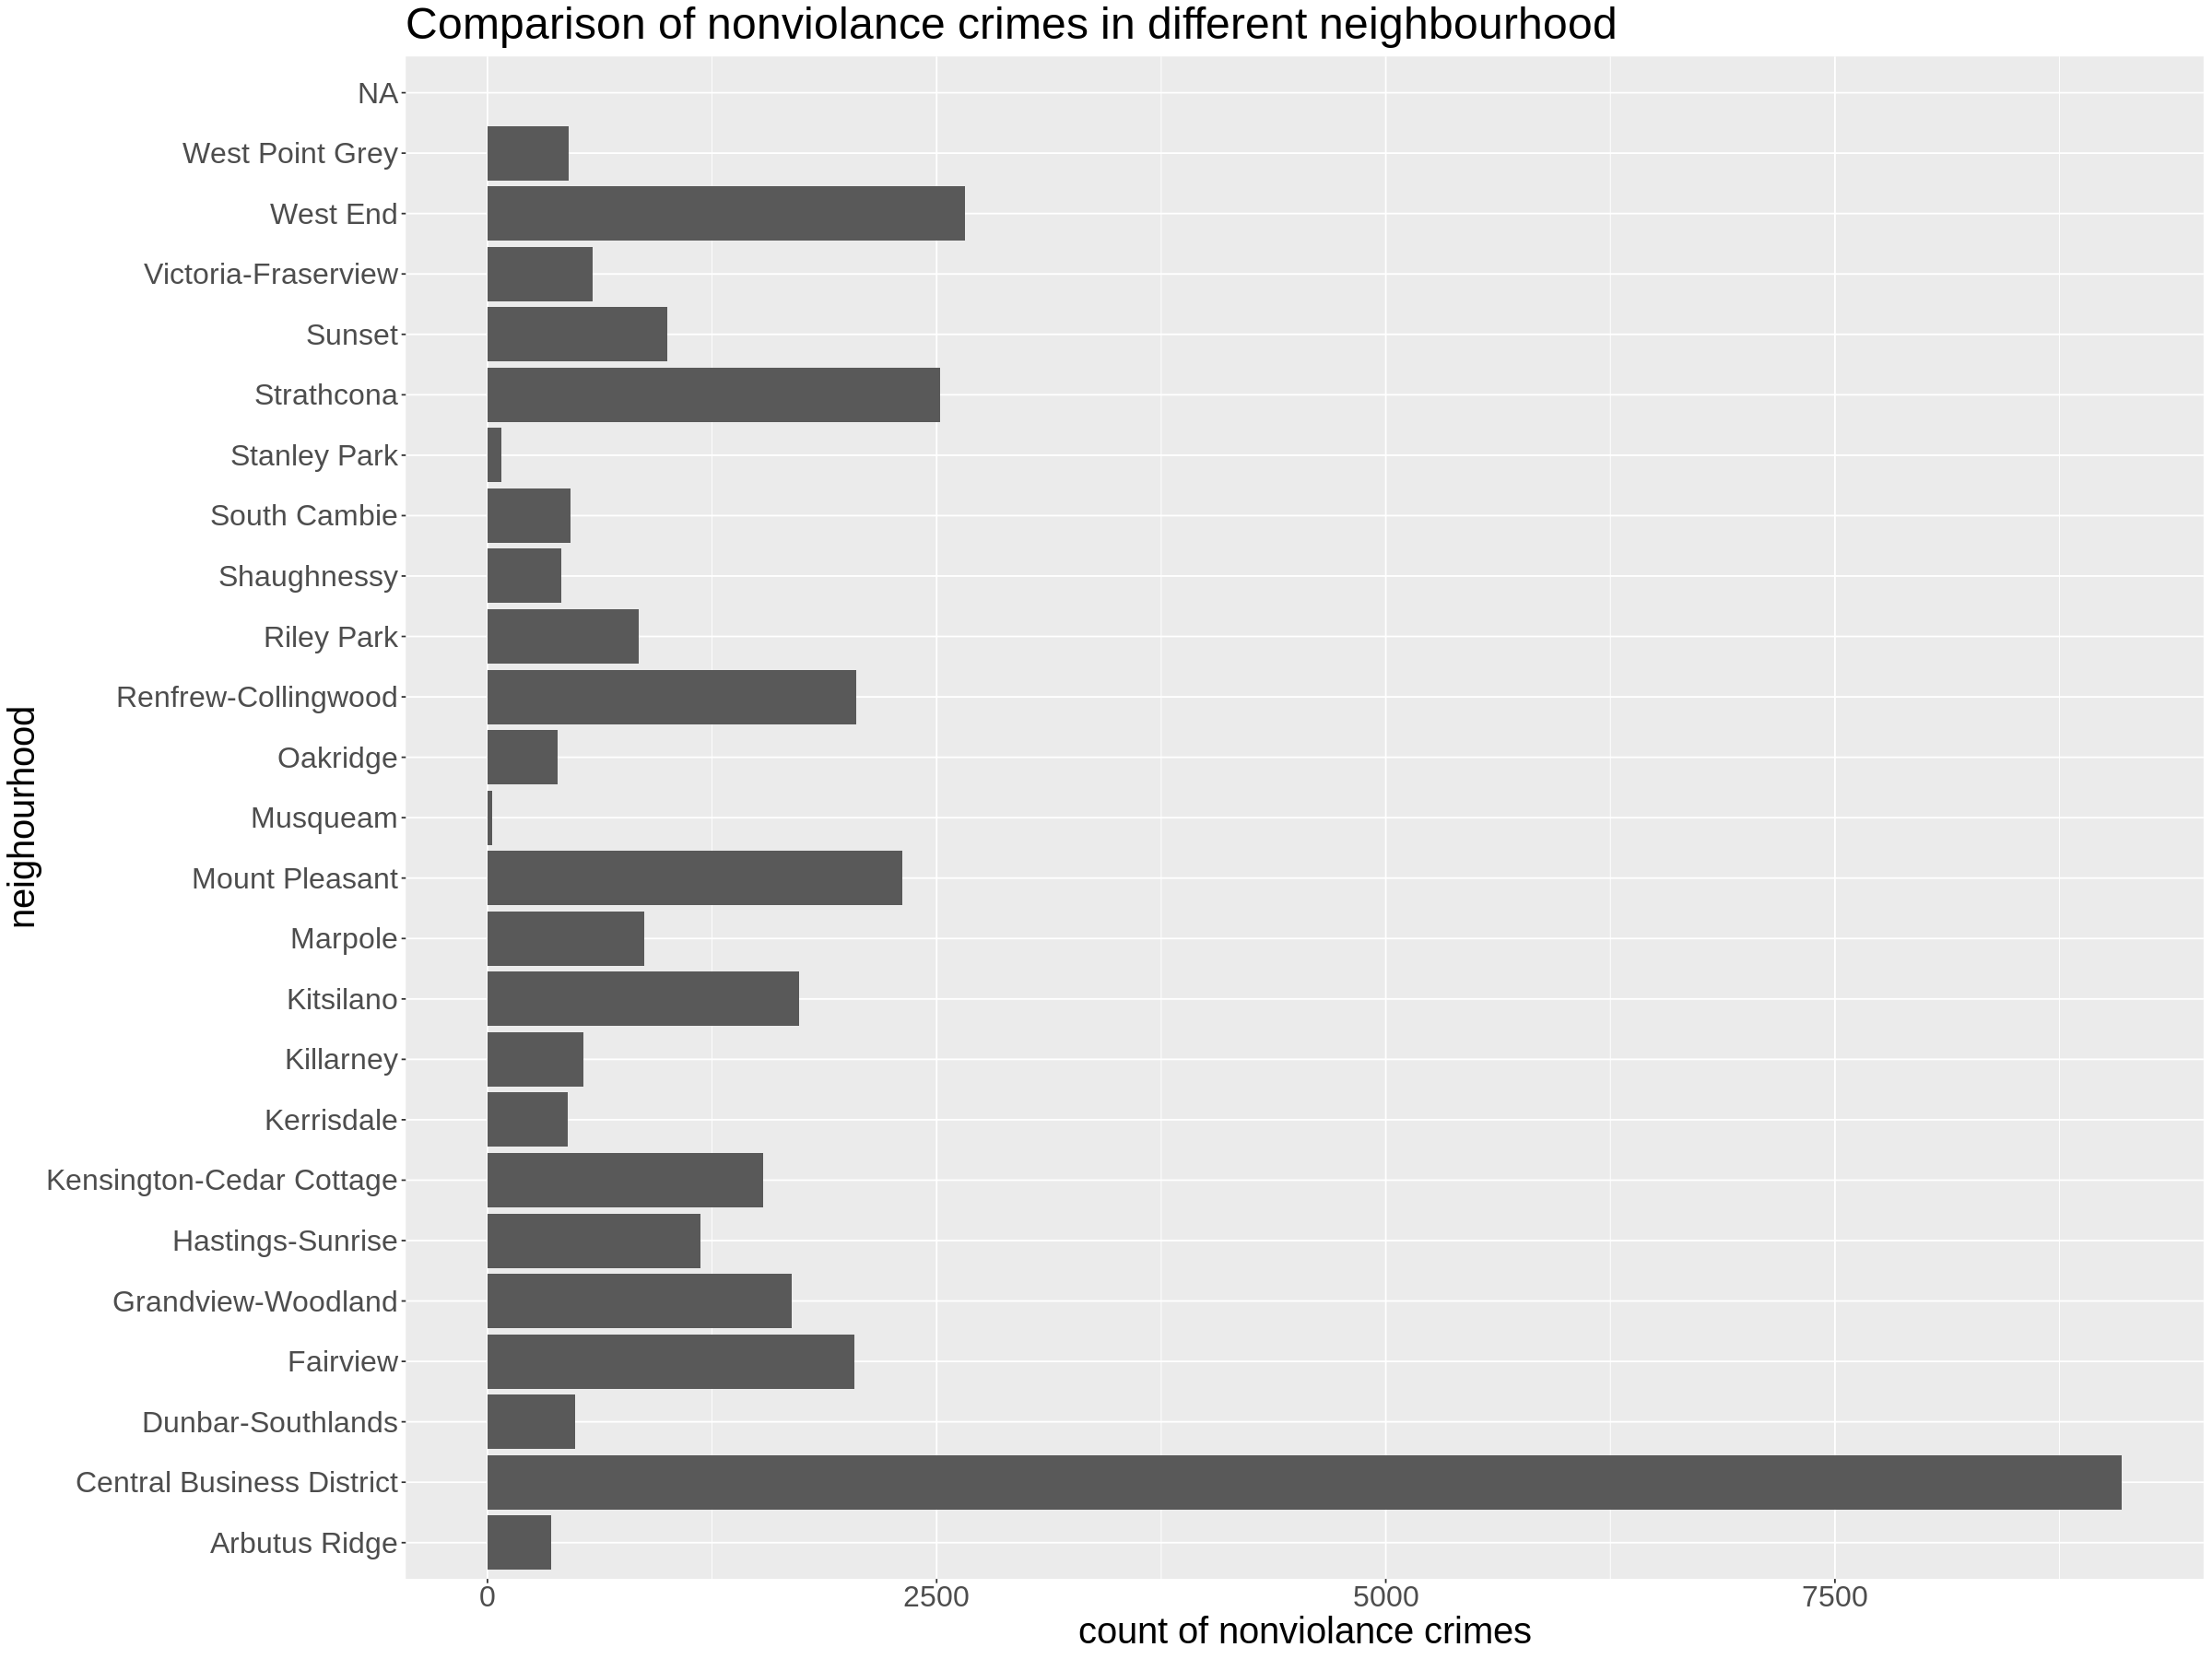

In [15]:
options(repr.plot.width = 20, repr.plot.height = 15)
count_nonviolent_plot <- nonviolance_data %>%
             ggplot(aes(x = NEIGHBOURHOOD)) +
             geom_bar() +
             xlab("neighourhood") +
             ylab("count of nonviolance crimes") +
             ggtitle("Comparison of nonviolance crimes in different neighbourhood") +
             coord_flip() +
             theme(text = element_text(size = 24))        
count_nonviolent_plot

In [9]:
prop_nonviolent_crime <- crime_data_full %>%
              group_by(NEIGHBOURHOOD) %>%
              summarize(prop = sum(Violent == FALSE)/n())
prop_nonviolent_crime

NEIGHBOURHOOD,prop
<chr>,<dbl>
Arbutus Ridge,0.9540541
Central Business District,0.8788523
Dunbar-Southlands,0.9606299
Fairview,0.9559719
Grandview-Woodland,0.8726147
Hastings-Sunrise,0.9215229
Kensington-Cedar Cottage,0.9268882
Kerrisdale,0.9695652
Killarney,0.9066214


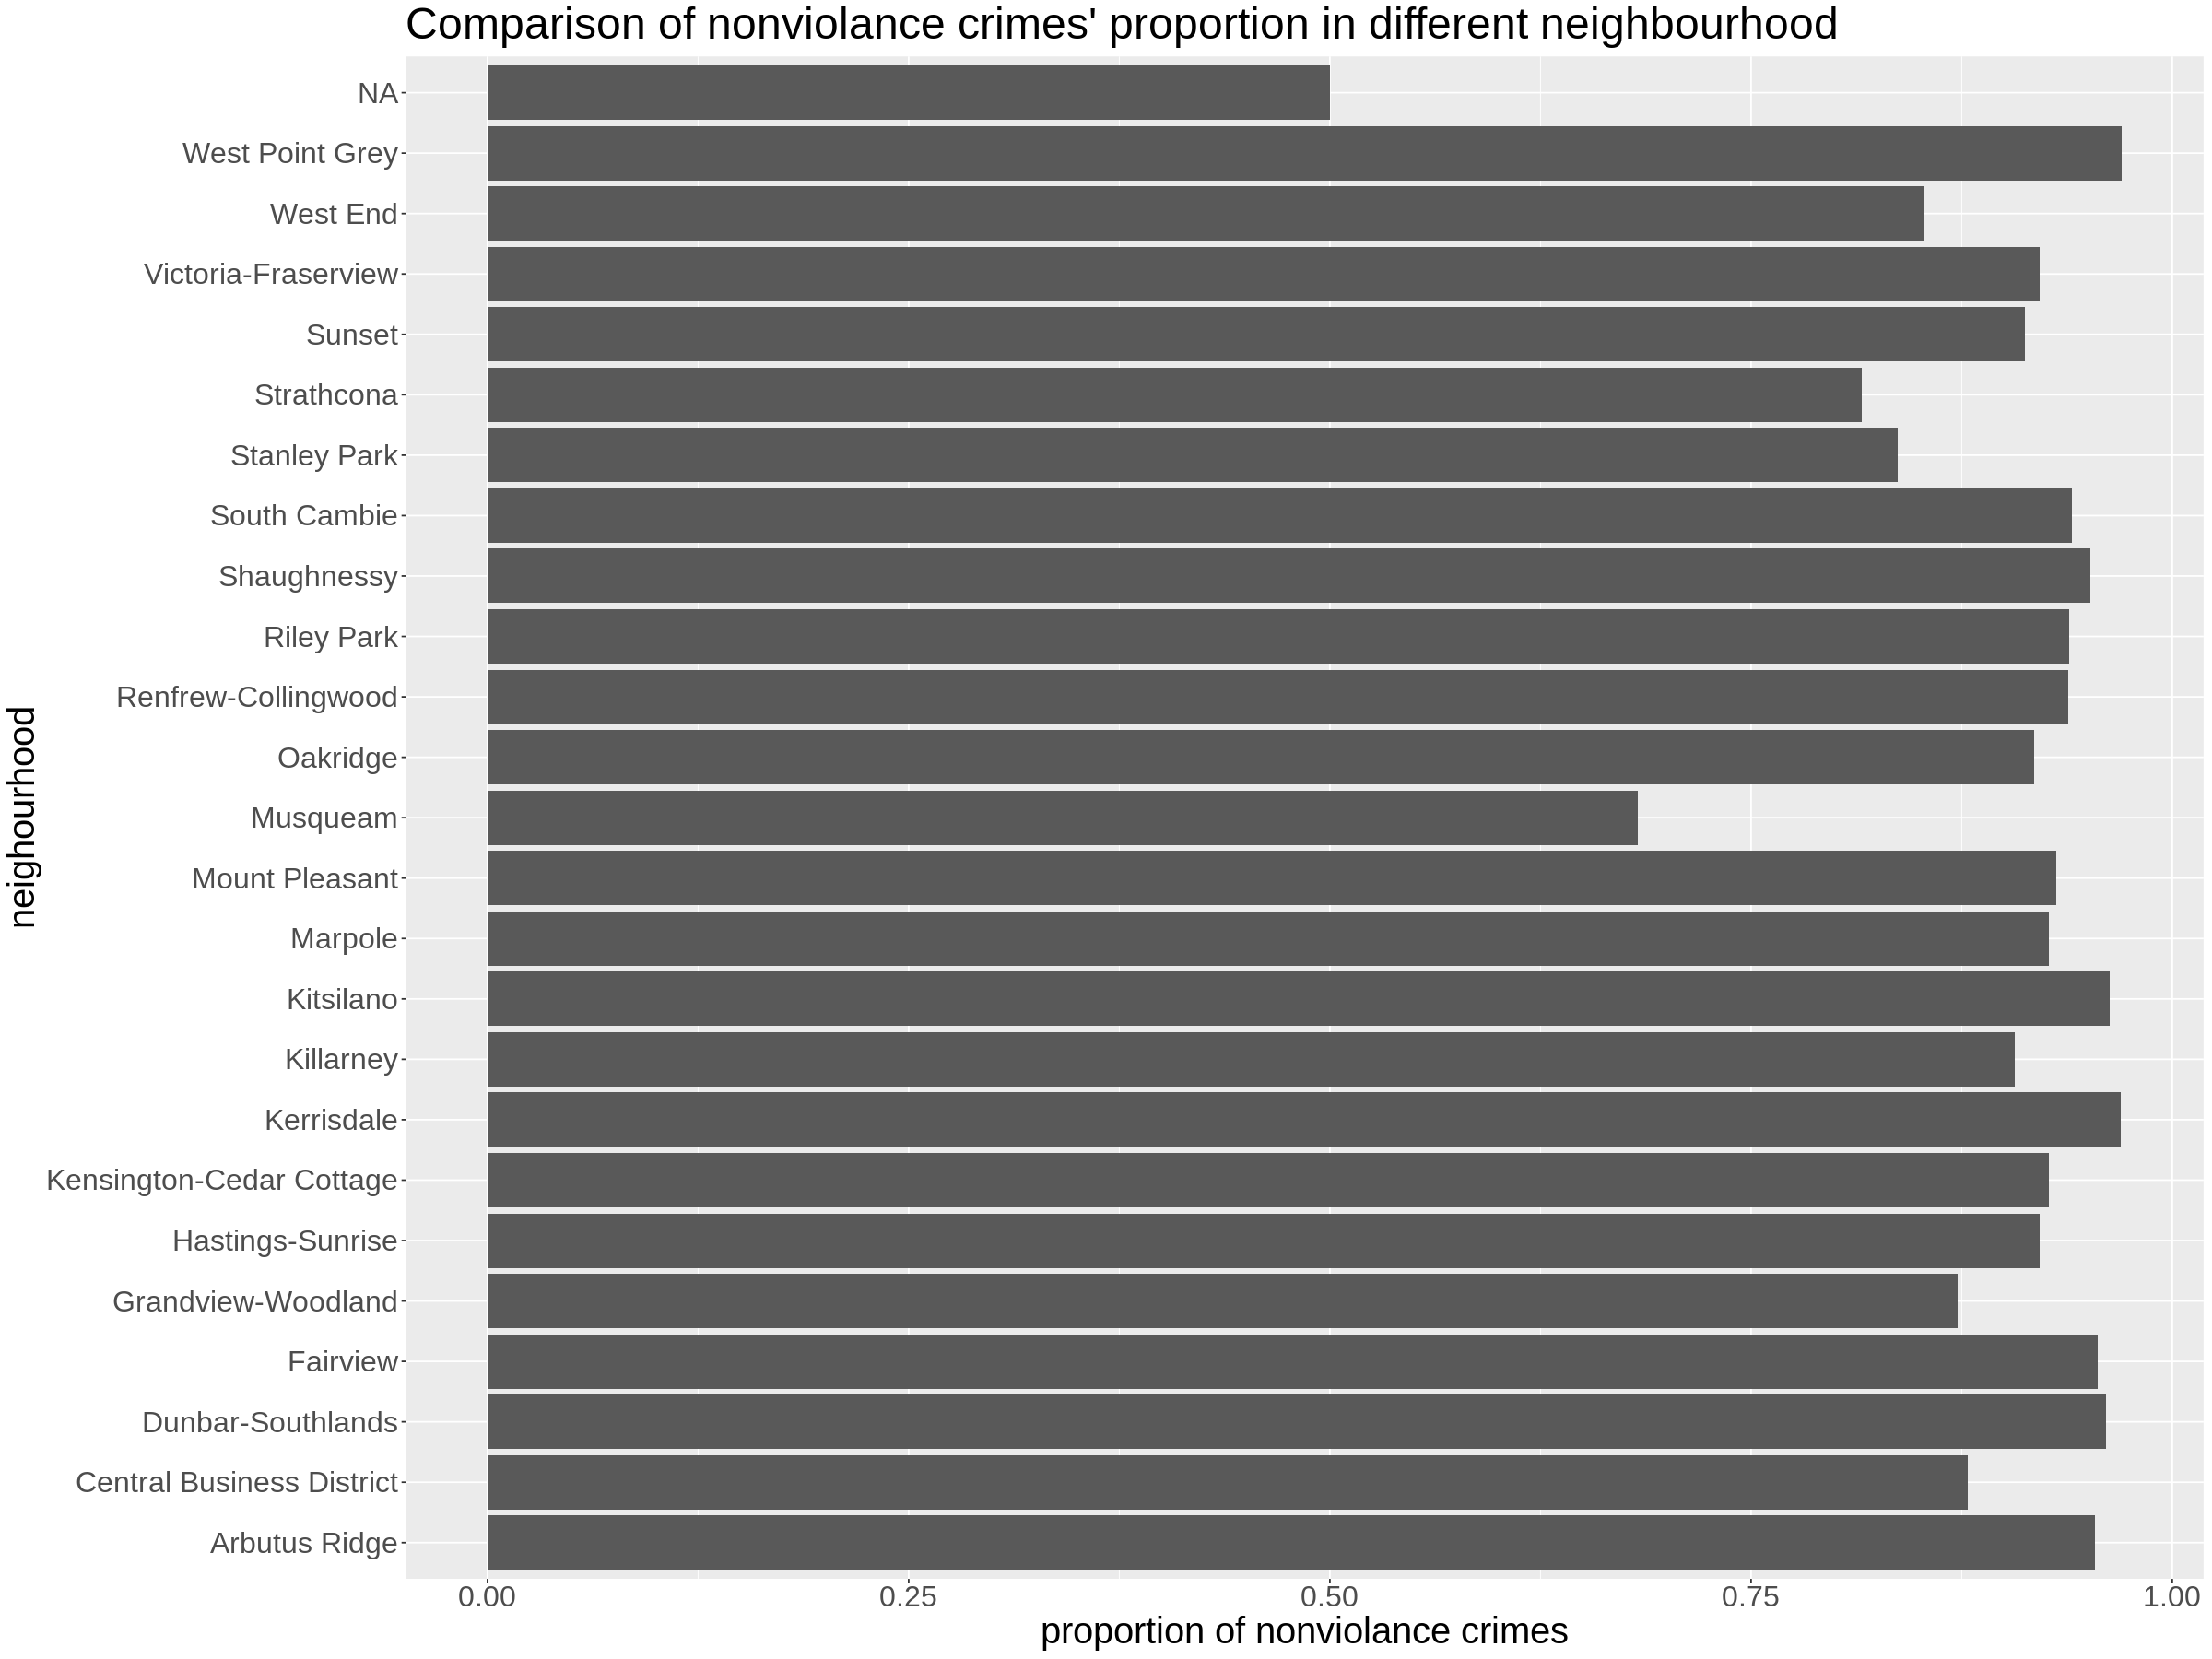

In [10]:
options(repr.plot.width = 20, repr.plot.height = 15)
prop_nonviolent_plot <- prop_nonviolent_crime %>%
             ggplot(aes(x = NEIGHBOURHOOD, y = prop)) +
             geom_bar(stat = 'identity') +
             xlab("neighourhood") +
             ylab("proportion of nonviolance crimes") +
             ggtitle("Comparison of nonviolance crimes' proportion in different neighbourhood") +
             coord_flip() +
             theme(text = element_text(size = 24))        
prop_nonviolent_plot

For the second statistic of our project, we are going to compute the average time of when crimes occur in vancouver (all crimes), and find the standard deviation given that time.

For this we are going to use the crime_data_full dataset since we need some of the columns that were selected out in the crime_data dataset,

In [11]:
mean_hour_of_crime <- crime_data_full %>%
                              group_by(Violent) %>%
                              summarise(mean_hour_of_crime = mean(HOUR))
mean_hour_of_crime

Violent,mean_hour_of_crime
<lgl>,<dbl>
FALSE,12.72242
TRUE,0.00000


Noon time seems to be when the most crimes occur daily.

To visualize this statistic, we must use a histogram.

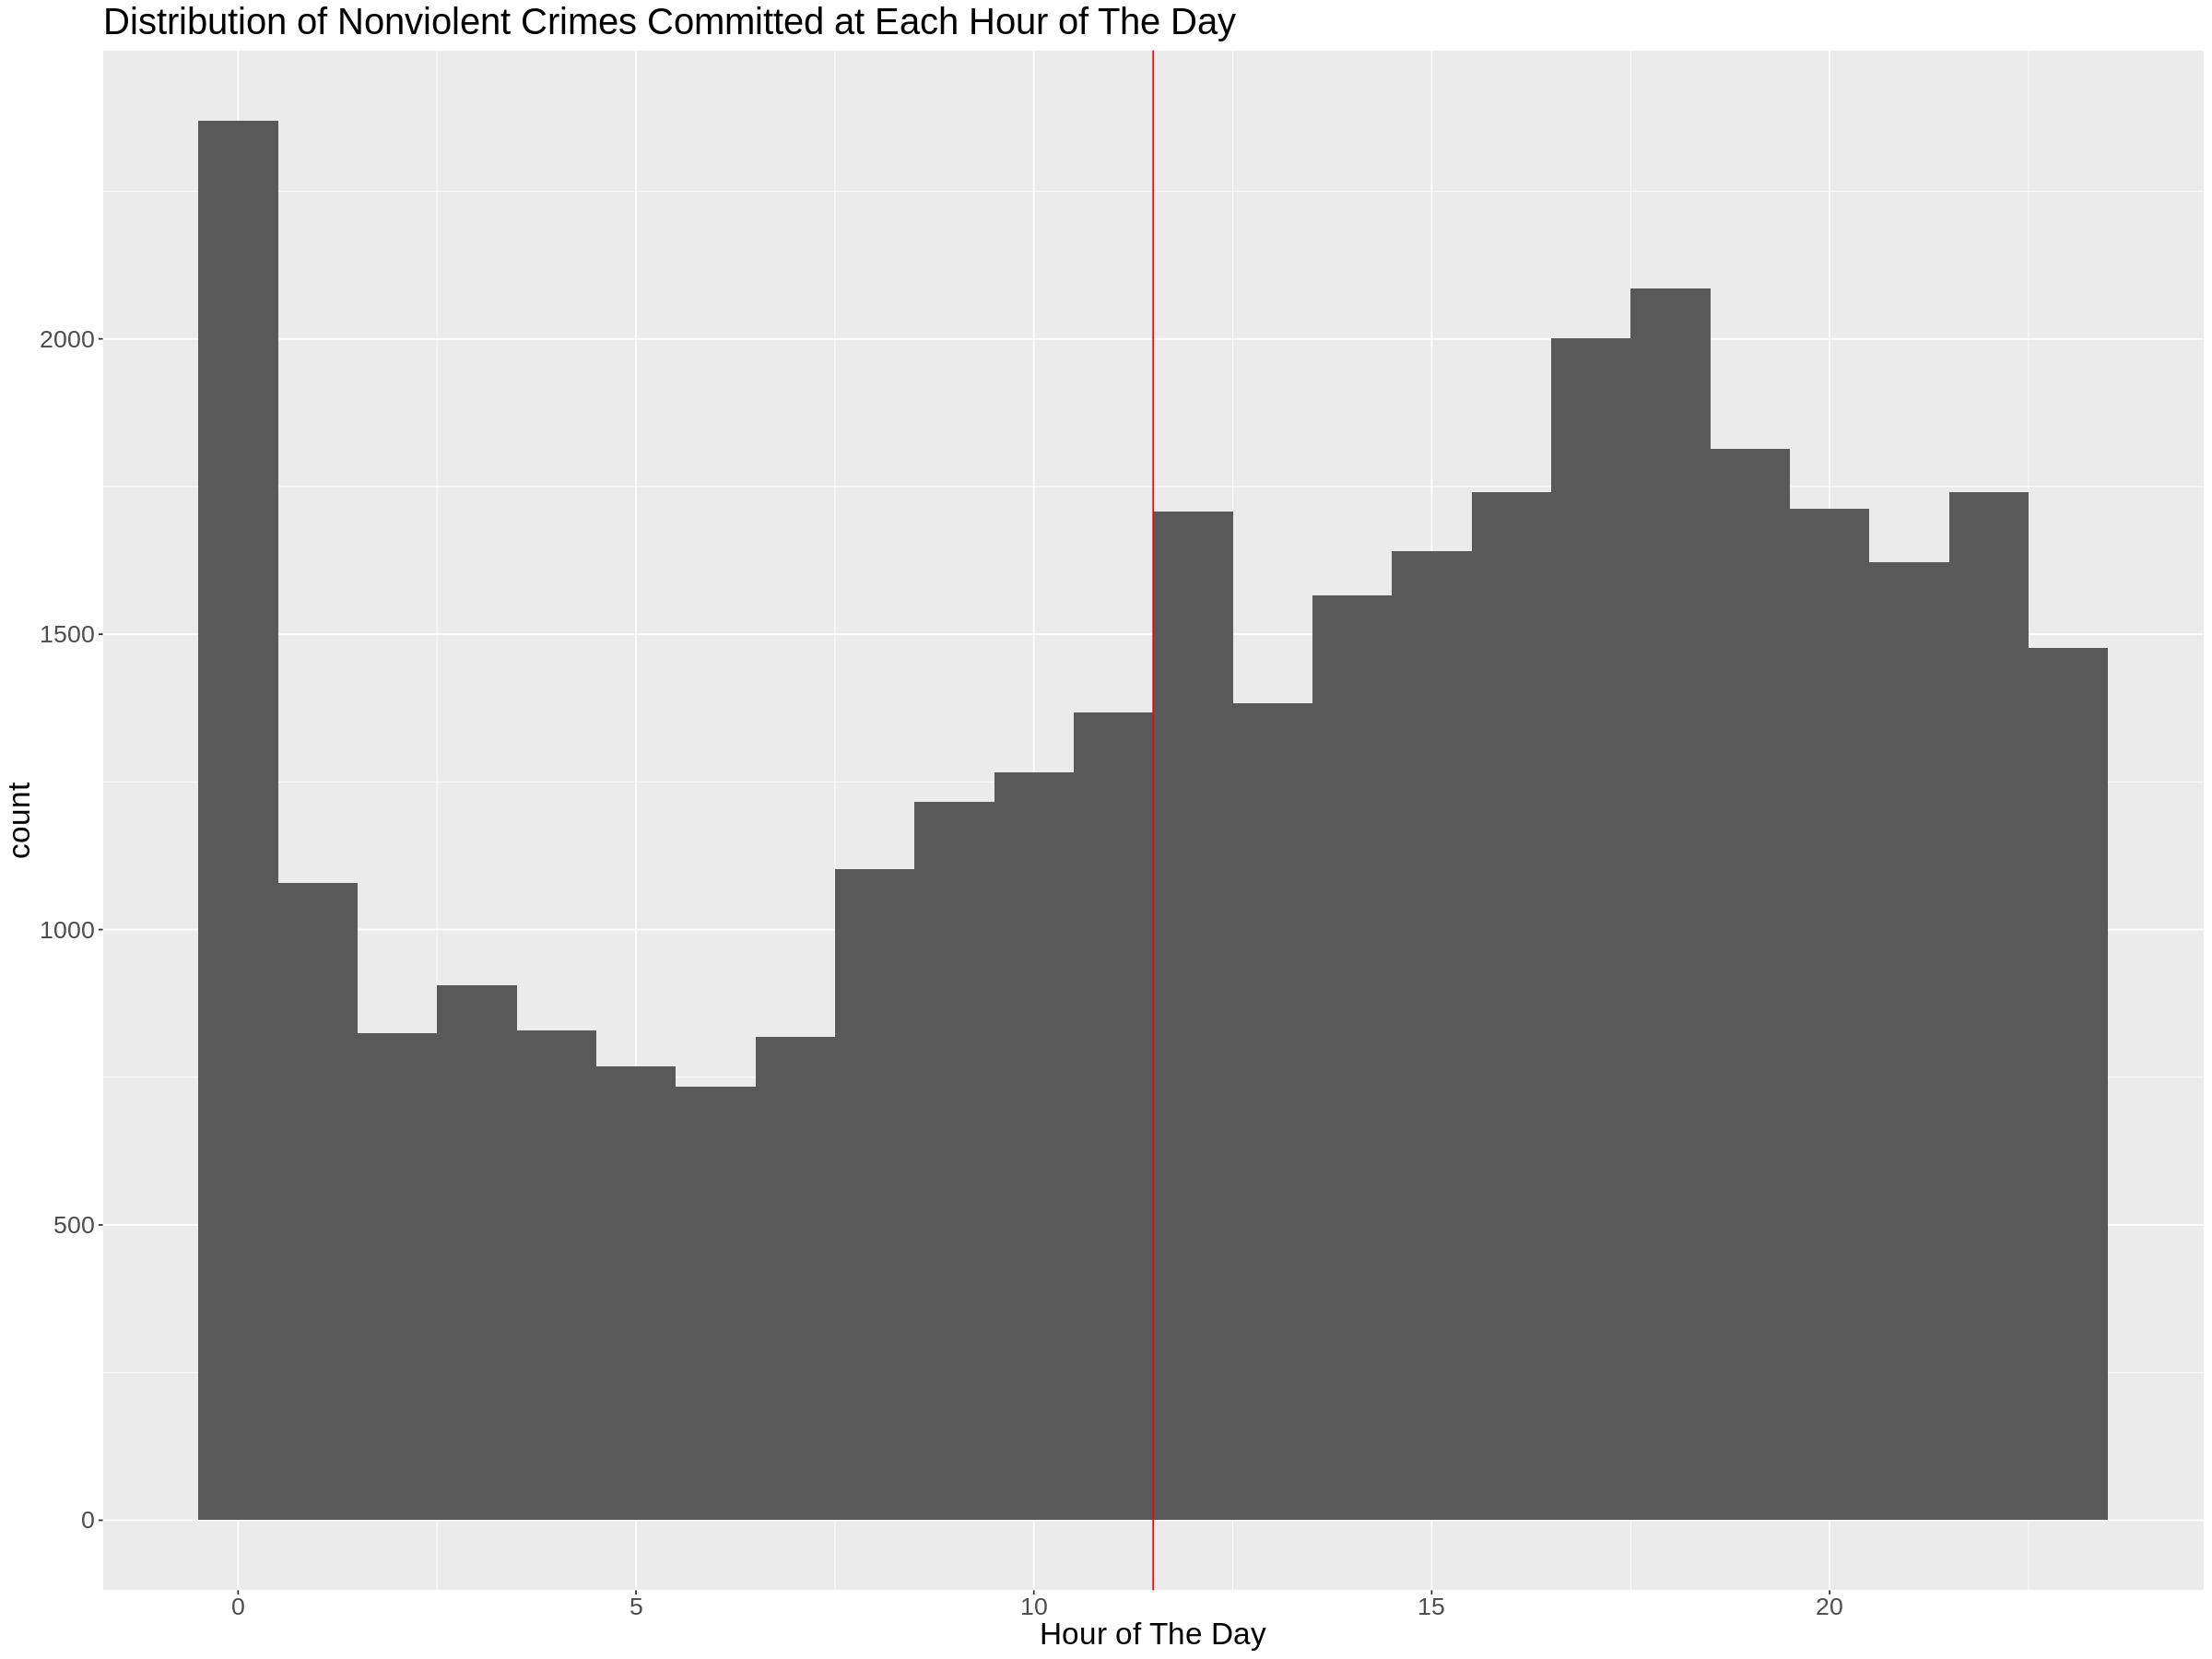

In [12]:
hour_of_nonviolent_crime <- crime_data_full %>%
                         filter(Violent == "FALSE")
crime_hour_plot <- 
    hour_of_nonviolent_crime %>%  
    ggplot(aes(x = HOUR)) +
    geom_histogram(binwidth = 1) +
    geom_vline(xintercept = 11.5, colour = "red", size = 0.5) +
    labs(title = "Distribution of Nonviolent Crimes Committed at Each Hour of The Day",
         x = "Hour of The Day") +
    theme(text = element_text(size = 20))


crime_hour_plot